In [116]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [117]:
import mlflow
import os
import numpy as np 
import pandas as pd

In [118]:
mlflow.set_experiment("loan_status") # We are creating some kind of folder, where we  will track  all the metrics/parameters we are interested in.
mlflow.set_tag('mlfow.runName','loan_status_run3')
#Three famous API
#1. log_param - 
#2. log_metric
#3. log_artifact, files like  model pkl file or confusion-matrix jpg file or any dataset. Limit by 5GB

# Importing Dataset

In [119]:
train_df = pd.read_csv('train_flask.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
#Let's Binary encode gender, married and loan status
train_df['Gender'] = train_df['Gender'].map({'Male':0, 'Female': 1})
train_df['Married'] = train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N':0,'Y':1})

In [121]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Let's Create our feature

In [123]:
feature_columns = ['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']
x = train_df[feature_columns]
y = train_df.Loan_Status

mlflow.log_param("feature_columns", feature_columns)
x.shape, y.shape

((480, 5), (480,))

## Splitting data 

In [124]:
from sklearn.model_selection  import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=5)

## Train A model

In [125]:
from sklearn.ensemble import RandomForestClassifier
depth = 4
mlflow.log_param("max_depth", depth)
model = RandomForestClassifier(max_depth=depth, random_state=5)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

In [126]:
from sklearn.metrics import accuracy_score
pred_val =  model.predict(x_val)
val_accuracy_score = accuracy_score(y_val, pred_val)
mlflow.log_metric("val_accuracy", val_accuracy_score)
print(f'Validation accuracy score ==> {val_accuracy_score}')

Validation accuracy score ==> 0.7916666666666666


In [127]:
pred_train = model.predict(x_train)
train_accuracy_score = accuracy_score(y_train, pred_train)
mlflow.log_metric("train_accuracy", train_accuracy_score)
print(f'Train accuracy score ==> {train_accuracy_score}')

Train accuracy score ==> 0.8385416666666666


In [128]:
mlflow.end_run()

# Some other Efficient ways (perhaps) of using MLFLOW


In [130]:
with mlflow.start_run():
	# train a random forest model

    max_depth = 7
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)

    model.fit(x_train, y_train)

    mlflow.log_param("max_depth", max_depth)

    mlflow.log_param("feature_columns", feature_columns)

    from sklearn.metrics import accuracy_score

    pred_val = model.predict(x_val)
    val_accuracy = accuracy_score(y_val, pred_val)

    mlflow.log_metric("val_accuracy", val_accuracy)

    pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, pred_train)

    mlflow.log_metric("train_accuracy", train_acc)

    mlflow.sklearn.log_model(model, "randomforest-model")

    mlflow.log_artifact("train_flask.csv") # limit of 5GB by default

2025/04/29 15:24:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Another way of using MLFLOW

In [132]:
def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(x_train, y_train)

        pred_val = model_rf.predict(x_val)
        val_acc=accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(x_train)
        train_acc=accuracy_score(y_train, pred_train)

        run="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName',run)
        mlflow.log_param('n_estimators',n_est)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")
        

mlflow_runs(10,2,1)
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)

2025/04/29 15:26:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/29 15:26:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/29 15:26:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/29 15:26:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/29 15:26:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/29 15:26:58 

## Let's try using KNN


2025/04/29 15:35:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


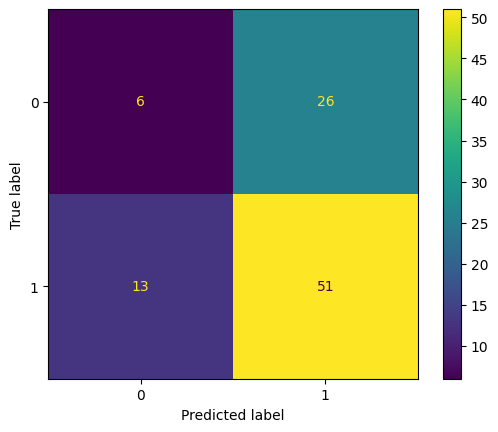

In [134]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(x_train, y_train)

    pred_val = knn_model.predict(x_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(x_train)
    train_acc=accuracy_score(y_train, pred_train)

    run="KNN"
    mlflow.set_tag('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, "model")